In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor

df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [2]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [3]:
df = df.drop('name', axis=1)
df = pd.get_dummies(df)
df.shape

(2360, 53)

In [4]:
def quick_plots(column):
    norm = np.random.normal(0, 1, len(df))
    norm.sort()
    earnings_sorted = column.sort_values()
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(norm, column.sort_values(), "o")
    plt.title('QQ Plot')
    
    plt.subplot(1,2,2)
    plt.scatter(x=column, y=df['next_year_compensation'])
    plt.title('Scatter Plot')
    plt.ylabel('Current Compensation')
    plt.xlabel('Column Name')
    plt.show()

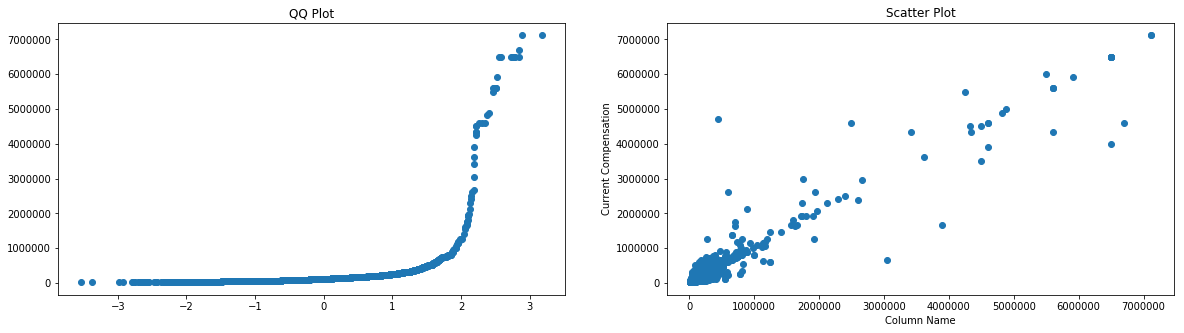

In [5]:
quick_plots(df.current_compensation)

In [7]:
df = df[df['current_compensation'] <5000000]

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
Y_train = df_train['next_year_compensation']
X_test = df_test.loc[:, ~(df_test.columns).isin(['next_year_compensation'])]
Y_test = df_test['next_year_compensation']

In [9]:
linear = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
theilsan = TheilSenRegressor()
ransac = RANSACRegressor()
huber = HuberRegressor()

In [10]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
    y = dataframe['next_year_compensation']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    mse_scores = cross_val_score(model,x,y, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean() * -1
    rmse = np.sqrt(mse)
    print(model)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

In [11]:
get_metrics(linear, df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Score: 0.699170182854
MSE: 3826941127.71
RMSE: 61862.2754812


In [12]:
get_metrics(ridge,df_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 Score: 0.700330754364
MSE: 3813277739.53
RMSE: 61751.7428056


In [13]:
get_metrics(gbr, df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 Score: 0.684217692489
MSE: 3959830717.25
RMSE: 62927.1858361


In [14]:
get_metrics(rfr, df_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 Score: 0.659887178846
MSE: 4299453993.94
RMSE: 65570.2218537


In [15]:
get_metrics(huber, df_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
R2 Score: 0.659785582952
MSE: 4313050476.72
RMSE: 65673.8188072


In [16]:
ridge.fit(X_train,Y_train)
print(ridge.coef_)
print(ridge.intercept_)
print(X_train.columns)

[  1.68612606e+03   1.21160801e+02   6.37095202e+03  -3.02350611e+03
  -2.20773303e+03   6.46833947e+01   9.05886359e+01   4.92363966e+03
   9.80925462e+02  -2.07353447e+03   8.37079160e+02   3.56837920e+03
   8.22652561e-01  -1.70049897e+04   8.90084098e+03  -2.44241730e+03
  -4.66732787e+03  -2.79650394e+03   2.66766894e+03  -2.25055899e+02
  -3.25667342e+03   5.16853741e+03   1.49947495e+03  -2.23573496e+04
   1.31731945e+04   3.43307240e+03  -1.78725144e+04  -4.51074164e+03
  -1.34726056e+03  -4.20229683e+03   8.45421083e+03   2.41782504e+04
  -3.21429572e+03  -7.45784929e+03   2.40453209e+03   4.67686219e+02
  -1.14608040e+03   2.27148950e+04  -7.17509522e+03   6.61408808e+03
  -6.63712183e+03  -1.32805304e+04   1.62720418e+04   1.96163541e+04
  -4.78287507e+03  -2.33178176e+02  -5.58230992e+03  -1.58911605e+03
  -1.04297941e+04  -4.59235303e+03  -9.85692893e+03   2.10958116e+04]
-7156894.89505
Index(['A', 'FC', 'G', 'GP', 'GS', 'MINS', 'OFF', 'R', 'SHTS', 'SOG', 'Y',
       'seas

In [17]:
linear.fit(X_train,Y_train)
print(linear.coef_)
print(linear.intercept_)
print(X_train.columns)

[  1.07225074e+03   4.91966136e+02   1.51055988e+04  -4.43441160e+03
  -4.44546343e+03   9.65161868e+01  -2.03082375e+03   6.73051342e+03
   5.58252600e+02  -6.53743728e+02  -1.87615312e+03   4.22275352e+03
   9.46217034e-01  -1.71364732e+04  -2.07066809e+03  -1.60889028e+03
  -3.89743663e+03  -8.74410428e+03  -7.08780311e+03  -6.82970113e+01
  -4.72479906e+03   5.20950751e+03  -7.20854177e+03  -6.41456144e+04
   3.04379357e+03   1.91435588e+03   4.16824486e+04  -1.33171833e+04
   1.80172763e+02  -2.03297696e+03   1.14233288e+04   4.25308419e+04
  -8.05925034e+03   2.64292188e+04  -4.61110138e+03  -9.49616565e+03
  -5.54365481e+03   2.32743760e+04  -6.94470966e+03   1.10096260e+04
   9.60602502e+03  -3.02486224e+03   5.38099561e+04  -1.71292889e+04
  -3.41905981e+03  -3.51434249e+03  -5.83298955e+03   1.69393547e+04
   2.73130797e+02  -4.39033021e+03   4.67945746e+04  -9.01121681e+04]
-8493655.97401
Index(['A', 'FC', 'G', 'GP', 'GS', 'MINS', 'OFF', 'R', 'SHTS', 'SOG', 'Y',
       'seas

In [ ]:
#Picking Linear Regression